# Chapter 1: Data science in a big data world

# Linear regression (Page 49)

In [ ]:
print("Linear Regression")
import statsmodels.api as sm
import numpy as np
predictors = np.random.random(1000).reshape(500,2)
target = predictors.dot(np.array([0.4,0.6])) + np.random.random(500)
lmRegModel = sm.OLS(target,predictors)
result = lmRegModel.fit()
result.summary()

# Chapter 2: The Data Science Process

# K-Nearest Neigbor Classification (Page 52)

In [9]:
print("K-Nearest Neighbors")
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
predictors = np.random.random(1000).reshape(500,2)
target = np.around(predictors.dot(np.array([0.4,0.6])) + np.random.random(500))
clf = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn = clf.fit (predictors,target)
knn.score(predictors,target)

# Applying on data to make prediction
prediction = knn.predict(predictors)

# Building confusion matrix
confusion_matrix(target, prediction)

K-Nearest Neighbors


array([[ 11,  30,   0],
       [  8, 405,   2],
       [  0,  39,   5]])

# Chapter 3: Machine Learning

# Gaussian Naive Bayes Classifier - example of supervised machine learning algorithm (Page 67)

In [11]:
# Loading MNIST images 
print("Gaussian Naive Bayes Classifier")
from sklearn.datasets import load_digits
import pylab as pl
digits = load_digits()

Gaussian Naive Bayes Classifier


In [12]:
# Turns images into gray-scale value
pl.gray()

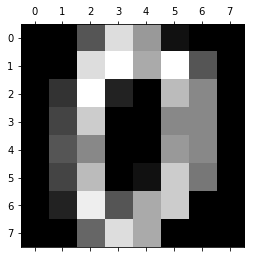

In [13]:
# Shows first images
pl.matshow(digits.images[0])
pl.show()

In [14]:
# Shows the corresponding matrix
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [15]:
# Load libraries for further analysis
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [16]:
# Selecting target variable
y = digits.target

In [17]:
# Preparing data. Reshape adapts the matric form. This method could,for instance, turn a 10x10 matrix into 100 vectors
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

In [18]:
print(X)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [19]:
# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
# Select a Naïve Bayes classifier; use a Gaussian distribution to estimate probability
gnb = GaussianNB()

In [21]:
# Fitting data
fit = gnb.fit(X_train,y_train)

In [22]:
# Predict data for unseen data
predicted = fit.predict(X_test)

In [23]:
# Create confusion matrix
confusion_matrix (y_test, predicted)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

In [24]:
# Stores number image matrix and its prediction (as a number) together in array
images_and_predictions = list(zip(digits.images, fit.predict(X)))

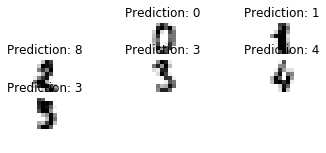

In [25]:
# Looping through first 7 images
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(6, 3 ,index + 5)
    plt.axis('off') # Doesn’t show an axis.
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # Shows image in grayscale
    plt.title('Prediction: %i' % prediction) # Shows the predicted value as the title to the shown image
plt.show() # Shows the full plot that is now populated with 6 subplots

# Principal Component Analysis - example of unsupervised machine learning algorithm (Page 74)

In [55]:
# Loading relevant libraries
print("Principal Component Analysis")
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

Principal Component Analysis


In [56]:
# Set up the url to file
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [57]:
# Read in csv file
data = pd.read_csv(url, sep= ";")

In [58]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
# Creating matrix of independent variables 
X = data[[u'fixed acidity', u'volatile acidity', u'citric acid',
u'residual sugar', u'chlorides', u'free sulfur dioxide',
u'total sulfur dioxide', u'density', u'pH', u'sulphates',
u'alcohol']]

In [60]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [61]:
# Set up the dependent variable
y = data.quality

In [62]:
# Standardizing data: when standardizing data, the following formula is applied to every data
# point: z = (x-)/, where z is the new observation value, x the old one,  is
# the mean, and  the standard deviation. The PCA of a data matrix is easier
# to interpret when the columns have first been centered by their means.
X = preprocessing.StandardScaler().fit(X).transform(X)
# Here initial dta preparation is done and we can start executing PCA

In [63]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ..., 
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

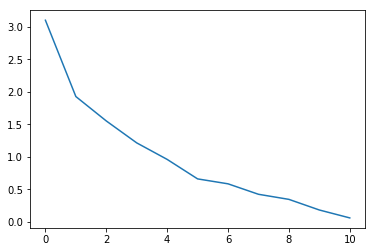

In [64]:
model = PCA() # Creates instance of principal component analysis class
results = model.fit(X) # Applies PCA on predictor variables to see if they can be compacted into fewer variables
Z = results.transform(X) # Turns result into array so we can use newly created data
plt.plot(results.explained_variance_) # Plots explained variance in variables; this plot is a scree plot
plt.show() # Shows plot

In [65]:
# Showing PCA Components in a Pandas data frame
pd.DataFrame(results.components_, columns=list(
    [u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar',
    u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density',
    u'pH', u'sulphates', u'alcohol']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
5,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
6,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
9,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


In [103]:
# Wine score prediction before principal component analysis
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [104]:
# Use Gaussian distribution Naïve Bayes classifier for estimation
gnb = GaussianNB()

In [105]:
# Fit data
fit = gnb.fit(X,y)

In [106]:
# Predict data for unseen data
pred = fit.predict(X)

In [119]:
# Study confusion matrix
print (confusion_matrix(pred,y))

[[  4   2   3   0   0   0]
 [  1   3  22  13   2   0]
 [  3  24 415 131   7   0]
 [  2  24 234 452 127   9]
 [  0   0   7  39  63   9]
 [  0   0   0   3   0   0]]


In [120]:
# Count of all correctly classified cases: all counts on
# trace or diagonal summed up after analyzing confusion
# matrix. We can see the Naïve Bayes classifier scores
# 897 correct predictions out of 1599.
print (confusion_matrix(pred,y).trace())

937


[712]
[712, 816]
[712, 816, 903]
[712, 816, 903, 893]
[712, 816, 903, 893, 904]
[712, 816, 903, 893, 904, 920]
[712, 816, 903, 893, 904, 920, 930]
[712, 816, 903, 893, 904, 920, 930, 927]
[712, 816, 903, 893, 904, 920, 930, 927, 937]


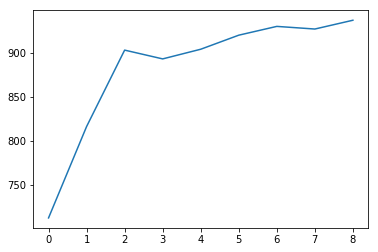

In [121]:
predicted_correct = [] # Wine score prediction with increasing number of principal components
for i in range(1,10):
    model = PCA(n_components = i) # Loops through first 10 detected principal components
    results = model.fit(X) # Fit PCA model on x-variables (features)
    Z = results.transform(X) # Z is result in matrix form (actually an array filled with arrays)
    fit = gnb.fit(Z,y) # Use Gaussian distribution Naïve Bayes classifier for estimation
    pred = fit.predict(Z) # The actual prediction itself using the fitted model
    predicted_correct.append(confusion_matrix(pred,y).trace()) # At end of each iteration we append number of correctly classified observations
    print (predicted_correct) # Printing this array we can see how after each iteration, new count of correctly classified observations is appended
plt.plot(predicted_correct) # Easier to see when array plotted
plt.show() # Plot shown

# Iris classification example- example of unsupervised machine learning algorithm  k-means clustering (Page 81)

In [124]:
import sklearn
from sklearn import cluster
import pandas as pd

In [125]:
# Import iris dataset from sklearn
data = sklearn.datasets.load_iris()

In [129]:
data.info()

AttributeError: info

In [130]:
# Transform iris data into Pandas data frame
X = pd.DataFrame(data.data, columns = list(data.feature_names))

In [134]:
# Print 5 first observations
print(X[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [143]:
# Initialize a k-means cluster model with 3
# clusters. The random_state is a random
# seed; if you don’t put it in, the seed will also
# be random. We opt for 3 clusters because
# we saw in the last listing this might be a
# good compromise between complexity
# and performance.
model = cluster.KMeans(n_clusters=3, random_state=25)

In [144]:
results = model.fit(X)

In [145]:
# Add column with cluster to data frame
X['cluster'] = results.predict(X)

In [146]:
# Let’s finally add a target variable (y) to the data frame
X["target"] = data.target

In [147]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
5,5.4,3.9,1.7,0.4,1,0
6,4.6,3.4,1.4,0.3,1,0
7,5.0,3.4,1.5,0.2,1,0
8,4.4,2.9,1.4,0.2,1,0
9,4.9,3.1,1.5,0.1,1,0


In [148]:
# Adding a variable c is just a little trick
# we use to do a count later. The value
# here is arbitrary because we need a
# column to count the rows.
X["c"] = "lookatmeIamimportant"

In [150]:
# Three parts to this code. First we select the cluster,
# target, and c columns. Then we group by the cluster
# and target columns. Finally, we aggregate the row of
# the group with a simple count aggregation

classification_result = X[["cluster","target","c"]].groupby(["cluster","target"]).agg("count")

In [151]:
# Print the result
print(classification_result)      

                 c
cluster target    
0       1        2
        2       36
1       0       50
2       1       48
        2       14
